<a href="https://colab.research.google.com/github/lcmortech/data_science/blob/main/other_projects/westnile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **West Nile Virus - An NYC Timeline**

This will be an exploratory analysis on the west nile virus and its impact on the mosquito population of NYC.This will be used to gauge possible impacts on the environment over time, as well as any lasting impacts on the human population. Additionally, data gathered will be used to suggest possible strategies and solutions to dealing with the issue.

In [1]:
# import pandas

import pandas as pd

## **Adding Dataset**

The sources for the datasets were taken from:

https://www.cdc.gov/westnile/statsmaps/current-season-data.html

https://www.cdc.gov/westnile/statsmaps/historic-data.html

Cumulative Data for 1999-2022 (ArboNET)

Explore Human Data for 1999-2022  (ArboNET)

Other Sources:
https://guides.newman.baruch.cuny.edu/nyc_data

https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt

https://www.nyc.gov/site/doh/health/health-topics/west-nile-virus.page

https://www.health.ny.gov/diseases/west_nile_virus/


## **Which Questions Can Be Answered With The Following Datasets?**



*   Which demographic is most at risk of contracting the virus?
*   Which counties were most impacted?
*   Did any particular year see a spike in activity?
*   Is population size a factor in which locations are most impacted?
*   What steps and suggestions can be taken to minimize the spread of west nile virus, according to the data?



In [2]:
#read csvs into notebook

df1 = pd.read_csv('https://raw.githubusercontent.com/lcmortech/data_science/main/westnile-demog-1999-2022.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/lcmortech/data_science/main/westnile-human-avg-1999-2023.csv')
df3 = pd.read_csv('https://raw.githubusercontent.com/lcmortech/data_science/main/westnile-case-reports-by-state-and-year.csv')
df4 = pd.read_csv('https://raw.githubusercontent.com/lcmortech/data_science/main/westnile-illness-onset-1999-2022.csv')
df5 = pd.read_csv('https://raw.githubusercontent.com/lcmortech/data_science/main/westnile-illness-onset-by-month-1999-2022.csv')
df6 = pd.read_csv('https://raw.githubusercontent.com/lcmortech/data_science/main/westnile-pop-by-residence-1999-2022%20.csv')

## **Analyzing the Raw Data**

In [3]:
df1.head(7)

# It appears as though the risk of infection increases by age, and appears to be higher in males than females

,Age,Male,Female
0,<18,3.89,2.69
1,18-29,3.95,3.36
2,30-39,5.95,5.21
3,40-49,9.15,7.83
4,50-59,11.23,8.51
5,60-69,10.28,6.69
6,70+,12.62,8.50


In [4]:
df2.head()

,Type,Year,County,Population,Incidence,Legend
0,Neuroinvasive disease cases,1999-2022,1001,55229,0.53,0.38 to 1.09
1,Neuroinvasive disease cases,1999-2022,1003,186579,0.40,0.38 to 1.09
2,Neuroinvasive disease cases,1999-2022,1005,27344,0.15,0.01 to 0.16
3,Neuroinvasive disease cases,1999-2022,1007,22736,0.37,0.17 to 0.37
4,Neuroinvasive disease cases,1999-2022,1011,10680,0.39,0.38 to 1.09


In [5]:
df2.tail()

,Type,Year,County,Population,Incidence,Legend
2065,Neuroinvasive disease cases,1999-2022,56039,21422,0.19,0.17 to 0.37
2066,Neuroinvasive disease cases,1999-2022,56041,20901,0.40,0.38 to 1.09
2067,Neuroinvasive disease cases,1999-2022,56043,8451,2.47,>1.10
2068,Neuroinvasive disease cases,1999-2022,56045,7142,2.33,>1.10
2069,Neuroinvasive disease cases,1999-2022,72127,386927,0.01,0.01 to 0.16


In [6]:
df3.head()

# What can be pulled from this
# We specifically want data for NY, and possibly specifically NYC
# NY Data - 34 	All disease cases 	1999-2022 	NY 	1126 	>50

,Type,Year,State,Reported Cases,Legend categories
0,All disease cases,1999-2022,AK,3,1 to 6
1,All disease cases,1999-2022,AL,391,>50
2,All disease cases,1999-2022,AR,365,>50
3,All disease cases,1999-2022,AZ,3707,>50
4,All disease cases,1999-2022,CA,7597,>50


In [7]:
df4.head(50)

# The amount of cases appears to fluctuate by year, but has increased overall since 1999.

,Year,Reported Cases
0,1999,62
1,2000,21
2,2001,66
3,2002,4156
4,2003,9862
5,2004,2539
6,2005,3000
7,2006,4269
8,2007,3630
9,2008,1356


Changed to df5.tail(50) for all rows

In [8]:
df5.head(50)

,Type,Year,Month,Reported Cases
0,All disease cases,1999-2022,Jan,32
1,All disease cases,1999-2022,Feb,18
2,All disease cases,1999-2022,Mar,32
3,All disease cases,1999-2022,Apr,54
4,All disease cases,1999-2022,May,233
5,All disease cases,1999-2022,Jun,1210
6,All disease cases,1999-2022,Jul,8893
7,All disease cases,1999-2022,Aug,25735
8,All disease cases,1999-2022,Sep,16217
9,All disease cases,1999-2022,Oct,3448


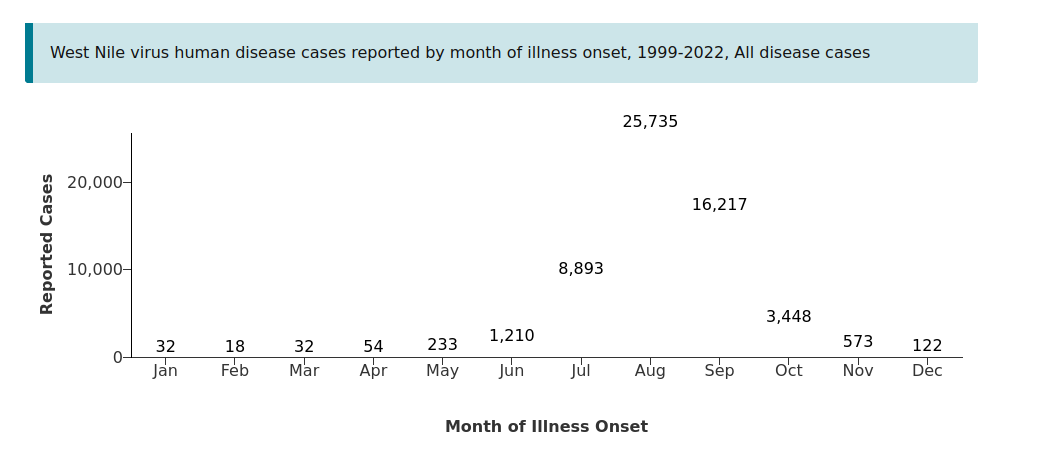

In [9]:
df6.head(10)

,Type,Year,County,Population,Incidence,Legend
0,Neuroinvasive disease cases,1999-2022,1001,55229,0.53,0.38 to 1.09
1,Neuroinvasive disease cases,1999-2022,1003,186579,0.40,0.38 to 1.09
2,Neuroinvasive disease cases,1999-2022,1005,27344,0.15,0.01 to 0.16
3,Neuroinvasive disease cases,1999-2022,1007,22736,0.37,0.17 to 0.37
4,Neuroinvasive disease cases,1999-2022,1011,10680,0.39,0.38 to 1.09
5,Neuroinvasive disease cases,1999-2022,1013,20867,0.20,0.17 to 0.37
6,Neuroinvasive disease cases,1999-2022,1015,117767,0.11,0.01 to 0.16
7,Neuroinvasive disease cases,1999-2022,1017,34016,0.24,0.17 to 0.37
8,Neuroinvasive disease cases,1999-2022,1021,43682,0.29,0.17 to 0.37
9,Neuroinvasive disease cases,1999-2022,1029,14928,0.28,0.17 to 0.37


In [10]:
df6.tail(10)

,Type,Year,County,Population,Incidence,Legend
2060,Neuroinvasive disease cases,1999-2022,56025,76431,0.87,0.38 to 1.09
2061,Neuroinvasive disease cases,1999-2022,56027,2485,1.68,>1.10
2062,Neuroinvasive disease cases,1999-2022,56029,28462,1.02,0.38 to 1.09
2063,Neuroinvasive disease cases,1999-2022,56031,8695,7.67,>1.10
2064,Neuroinvasive disease cases,1999-2022,56033,29257,1.00,0.38 to 1.09
2065,Neuroinvasive disease cases,1999-2022,56039,21422,0.19,0.17 to 0.37
2066,Neuroinvasive disease cases,1999-2022,56041,20901,0.40,0.38 to 1.09
2067,Neuroinvasive disease cases,1999-2022,56043,8451,2.47,>1.10
2068,Neuroinvasive disease cases,1999-2022,56045,7142,2.33,>1.10
2069,Neuroinvasive disease cases,1999-2022,72127,386927,0.01,0.01 to 0.16


## **Basic Analysis for Each Data Frame**

In [11]:
df1.columns

Index(['Age', 'Male', 'Female'], dtype='object')

In [12]:
df1.shape

(7, 3)

In [13]:
df1.dtypes

Age        object
Male      float64
Female    float64
dtype: object

In [14]:
df2.columns

Index(['Type', 'Year', 'County', 'Population', 'Incidence', 'Legend'], dtype='object')

In [15]:
df2.dtypes

Type           object
Year           object
County          int64
Population      int64
Incidence     float64
Legend         object
dtype: object

In [16]:
df2.shape

(2070, 6)

In [17]:
df3.columns

Index(['Type', 'Year', 'State', 'Reported Cases', 'Legend categories'], dtype='object')

In [18]:
df3.shape

(52, 5)

In [19]:
df3.dtypes

Type                 object
Year                 object
State                object
Reported Cases        int64
Legend categories    object
dtype: object

In [20]:
df4.columns

Index(['Year', 'Reported Cases'], dtype='object')

In [21]:
df4.shape

(24, 2)

In [22]:
df4.dtypes

Year              int64
Reported Cases    int64
dtype: object

In [23]:
df5.columns

Index(['Type', 'Year', 'Month', 'Reported Cases'], dtype='object')

In [24]:
df5.shape

(12, 4)

In [25]:
df5.dtypes

Type              object
Year              object
Month             object
Reported Cases     int64
dtype: object

In [26]:
df6.columns

Index(['Type', 'Year', 'County', 'Population', 'Incidence', 'Legend'], dtype='object')

In [27]:
df6.shape

(2070, 6)

In [28]:
df6.dtypes

Type           object
Year           object
County          int64
Population      int64
Incidence     float64
Legend         object
dtype: object

## **Processing the Data**

**Methods needed**

df.isna - looks for null values

*   df.isna - looks for null values
*   fillna - replaces null values
* drop_duplicates - drops duplicate data
* loc - locates data ("select" in sql)


df.fillna - replaces null values
df.drop_duplicates - drops duplicate data
df.loc - locates data ("select" in sql)

In [29]:
df1.isna()

,Age,Male,Female
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False


In [30]:
df2.isna()

,Type,Year,County,Population,Incidence,Legend
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2065,False,False,False,False,False,False
2066,False,False,False,False,False,False
2067,False,False,False,False,False,False
2068,False,False,False,False,False,False


In [31]:
df3.isna()

,Type,Year,State,Reported Cases,Legend categories
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [32]:
df4.isna()

,Year,Reported Cases
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [33]:
df5.isna()

,Type,Year,Month,Reported Cases
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [34]:
df6.isna()

,Type,Year,County,Population,Incidence,Legend
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2065,False,False,False,False,False,False
2066,False,False,False,False,False,False
2067,False,False,False,False,False,False
2068,False,False,False,False,False,False


## **Current Problems**

* Upon checking, there doesn't appear to be any null values in any of the dataframes.
* Some of the dataframes can be joined by similar columns
* NYC Counties https://guides.newman.baruch.cuny.edu/nyc_data ,  
https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt
needed for dataframe 2 and 6:

    * The Bronx is Bronx County (ANSI / FIPS 36005)
    * Brooklyn is Kings County (ANSI / FIPS 36047)
    * Manhattan is New York County (ANSI / FIPS 36061)
    * Queens is Queens County (ANSI / FIPS 36081)
    * Staten Island is Richmond County (ANSI / FIPS 36085)


In [35]:
# Using df.isin() or df.eq to find info on the given counties:

df2.eq("36005").any(1)
df2.eq("36047").any(1)
df2.eq("36061").any(1)
df2.eq("36081").any(1)
df2.eq("Apple").any(1)


<ipython-input-35-a7fe03c5b013>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df2.eq("36005").any(1)
<ipython-input-35-a7fe03c5b013>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df2.eq("36047").any(1)
<ipython-input-35-a7fe03c5b013>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df2.eq("36061").any(1)
<ipython-input-35-a7fe03c5b013>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df2.eq("36081").any(1)
<ipython-input-35-a7fe03c5b013>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df2.eq("Apple").any(1)


0       False
1       False
2       False
3       False
4       False
        ...  
2065    False
2066    False
2067    False
2068    False
2069    False
Length: 2070, dtype: bool

In [36]:
# Using df.isin() and df.eq to find info on the given counties:

df6.eq("36005").any(1)
df6.eq("36047").any(1)
df6.eq("36061").any(1)
df6.eq("36081").any(1)
df6.eq("Apple").any(1)

# Unable to find counties

<ipython-input-36-ff6a8d2e9636>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df6.eq("36005").any(1)
<ipython-input-36-ff6a8d2e9636>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df6.eq("36047").any(1)
<ipython-input-36-ff6a8d2e9636>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df6.eq("36061").any(1)
<ipython-input-36-ff6a8d2e9636>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df6.eq("36081").any(1)
<ipython-input-36-ff6a8d2e9636>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df6.eq("Apple").any(1)


0       False
1       False
2       False
3       False
4       False
        ...  
2065    False
2066    False
2067    False
2068    False
2069    False
Length: 2070, dtype: bool

In [37]:
df2.loc[:,'County']

0        1001
1        1003
2        1005
3        1007
4        1011
        ...  
2065    56039
2066    56041
2067    56043
2068    56045
2069    72127
Name: County, Length: 2070, dtype: int64

In [38]:
df6.loc[:,'County']

0        1001
1        1003
2        1005
3        1007
4        1011
        ...  
2065    56039
2066    56041
2067    56043
2068    56045
2069    72127
Name: County, Length: 2070, dtype: int64

In [39]:
# Joining Dataframe 2 and 6

pd.concat([df2, df6], axis=1, join="inner")

,Type,Year,County,Population,Incidence,Legend,Type,Year,County,Population,Incidence,Legend
0,Neuroinvasive disease cases,1999-2022,1001,55229,0.53,0.38 to 1.09,Neuroinvasive disease cases,1999-2022,1001,55229,0.53,0.38 to 1.09
1,Neuroinvasive disease cases,1999-2022,1003,186579,0.40,0.38 to 1.09,Neuroinvasive disease cases,1999-2022,1003,186579,0.40,0.38 to 1.09
2,Neuroinvasive disease cases,1999-2022,1005,27344,0.15,0.01 to 0.16,Neuroinvasive disease cases,1999-2022,1005,27344,0.15,0.01 to 0.16
3,Neuroinvasive disease cases,1999-2022,1007,22736,0.37,0.17 to 0.37,Neuroinvasive disease cases,1999-2022,1007,22736,0.37,0.17 to 0.37
4,Neuroinvasive disease cases,1999-2022,1011,10680,0.39,0.38 to 1.09,Neuroinvasive disease cases,1999-2022,1011,10680,0.39,0.38 to 1.09
...,...,...,...,...,...,...,...,...,...,...,...,...
2065,Neuroinvasive disease cases,1999-2022,56039,21422,0.19,0.17 to 0.37,Neuroinvasive disease cases,1999-2022,56039,21422,0.19,0.17 to 0.37
2066,Neuroinvasive disease cases,1999-2022,56041,20901,0.40,0.38 to 1.09,Neuroinvasive disease cases,1999-2022,56041,20901,0.40,0.38 to 1.09
2067,Neuroinvasive disease cases,1999-2022,56043,8451,2.47,>1.10,Neuroinvasive disease cases,1999-2022,56043,8451,2.47,>1.10
2068,Neuroinvasive disease cases,1999-2022,56045,7142,2.33,>1.10,Neuroinvasive disease cases,1999-2022,56045,7142,2.33,>1.10


In [40]:
# Join dataframe 2 and dataframe 6 to create dataframe 7

df7 = df2.merge(df6, on='County', how='inner')
df8 = df2.merge(df6, on='County', how='outer')

In [41]:
df2.head()

,Type,Year,County,Population,Incidence,Legend
0,Neuroinvasive disease cases,1999-2022,1001,55229,0.53,0.38 to 1.09
1,Neuroinvasive disease cases,1999-2022,1003,186579,0.40,0.38 to 1.09
2,Neuroinvasive disease cases,1999-2022,1005,27344,0.15,0.01 to 0.16
3,Neuroinvasive disease cases,1999-2022,1007,22736,0.37,0.17 to 0.37
4,Neuroinvasive disease cases,1999-2022,1011,10680,0.39,0.38 to 1.09


In [42]:
df6.head()

,Type,Year,County,Population,Incidence,Legend
0,Neuroinvasive disease cases,1999-2022,1001,55229,0.53,0.38 to 1.09
1,Neuroinvasive disease cases,1999-2022,1003,186579,0.40,0.38 to 1.09
2,Neuroinvasive disease cases,1999-2022,1005,27344,0.15,0.01 to 0.16
3,Neuroinvasive disease cases,1999-2022,1007,22736,0.37,0.17 to 0.37
4,Neuroinvasive disease cases,1999-2022,1011,10680,0.39,0.38 to 1.09


In [43]:
df7.head(21)

,Type_x,Year_x,County,Population_x,Incidence_x,Legend_x,Type_y,Year_y,Population_y,Incidence_y,Legend_y
0,Neuroinvasive disease cases,1999-2022,1001,55229,0.53,0.38 to 1.09,Neuroinvasive disease cases,1999-2022,55229,0.53,0.38 to 1.09
1,Neuroinvasive disease cases,1999-2022,1003,186579,0.40,0.38 to 1.09,Neuroinvasive disease cases,1999-2022,186579,0.40,0.38 to 1.09
2,Neuroinvasive disease cases,1999-2022,1005,27344,0.15,0.01 to 0.16,Neuroinvasive disease cases,1999-2022,27344,0.15,0.01 to 0.16
3,Neuroinvasive disease cases,1999-2022,1007,22736,0.37,0.17 to 0.37,Neuroinvasive disease cases,1999-2022,22736,0.37,0.17 to 0.37
4,Neuroinvasive disease cases,1999-2022,1011,10680,0.39,0.38 to 1.09,Neuroinvasive disease cases,1999-2022,10680,0.39,0.38 to 1.09
5,Neuroinvasive disease cases,1999-2022,1013,20867,0.20,0.17 to 0.37,Neuroinvasive disease cases,1999-2022,20867,0.20,0.17 to 0.37
6,Neuroinvasive disease cases,1999-2022,1015,117767,0.11,0.01 to 0.16,Neuroinvasive disease cases,1999-2022,117767,0.11,0.01 to 0.16
7,Neuroinvasive disease cases,1999-2022,1017,34016,0.24,0.17 to 0.37,Neuroinvasive disease cases,1999-2022,34016,0.24,0.17 to 0.37
8,Neuroinvasive disease cases,1999-2022,1021,43682,0.29,0.17 to 0.37,Neuroinvasive disease cases,1999-2022,43682,0.29,0.17 to 0.37
9,Neuroinvasive disease cases,1999-2022,1029,14928,0.28,0.17 to 0.37,Neuroinvasive disease cases,1999-2022,14928,0.28,0.17 to 0.37


In [44]:
df7.tail(21)

,Type_x,Year_x,County,Population_x,Incidence_x,Legend_x,Type_y,Year_y,Population_y,Incidence_y,Legend_y
2049,Neuroinvasive disease cases,1999-2022,56001,36873,0.23,0.17 to 0.37,Neuroinvasive disease cases,1999-2022,36873,0.23,0.17 to 0.37
2050,Neuroinvasive disease cases,1999-2022,56003,11723,1.07,0.38 to 1.09,Neuroinvasive disease cases,1999-2022,11723,1.07,0.38 to 1.09
2051,Neuroinvasive disease cases,1999-2022,56005,46570,2.24,>1.10,Neuroinvasive disease cases,1999-2022,46570,2.24,>1.10
2052,Neuroinvasive disease cases,1999-2022,56007,15842,0.53,0.38 to 1.09,Neuroinvasive disease cases,1999-2022,15842,0.53,0.38 to 1.09
2053,Neuroinvasive disease cases,1999-2022,56009,13739,2.43,>1.10,Neuroinvasive disease cases,1999-2022,13739,2.43,>1.10
2054,Neuroinvasive disease cases,1999-2022,56011,7117,2.34,>1.10,Neuroinvasive disease cases,1999-2022,7117,2.34,>1.10
2055,Neuroinvasive disease cases,1999-2022,56013,40525,3.39,>1.10,Neuroinvasive disease cases,1999-2022,40525,3.39,>1.10
2056,Neuroinvasive disease cases,1999-2022,56015,13575,9.82,>1.10,Neuroinvasive disease cases,1999-2022,13575,9.82,>1.10
2057,Neuroinvasive disease cases,1999-2022,56017,4806,3.47,>1.10,Neuroinvasive disease cases,1999-2022,4806,3.47,>1.10
2058,Neuroinvasive disease cases,1999-2022,56019,8650,2.41,>1.10,Neuroinvasive disease cases,1999-2022,8650,2.41,>1.10


In [45]:
df7.eq("1035").all(1)
#df7.loc[df7['County'].eq(43254)]
#print(df7['County'].isin(['43254']))
#df7.loc[df7['County'] == '56029']

# ref: https://www.interviewqs.com/ddi-code-snippets/rows-cols-python

0       False
1       False
2       False
3       False
4       False
        ...  
2065    False
2066    False
2067    False
2068    False
2069    False
Length: 2070, dtype: bool

## **Q1: Which demographic is most at risk of contracting the virus?**

We can use Dataframe #1 to address this question:

In [46]:
# The head function allows us to analyze the dataframe

df1.head(11)

,Age,Male,Female
0,<18,3.89,2.69
1,18-29,3.95,3.36
2,30-39,5.95,5.21
3,40-49,9.15,7.83
4,50-59,11.23,8.51
5,60-69,10.28,6.69
6,70+,12.62,8.50


In [47]:
# Finding the mean of each percentage for each column (male and female cases):
#df1_age_mean = df1["Age"].mean()
print(df1["Male"].mean())
print(df1["Female"].mean())

8.152857142857142
6.112857142857143


**Answer:** According to Dataframe #1, we can see that **older males** are most at risk of contacting the virus, at an average rate of 8% between the ages of 30 and 49, while females between the ages of 50-59 were most at risk.

## **Q2: Which counties were most impacted?**


*   Which datasets use county for their columns? **Dataframes 2 and 6**
*   How do we find counties in the NYC metropolitan area? **Checking the sources for county codes**
*   Which counties are located in NYC?
*   How do we extract that data?

The current main issue is using methods such as .loc[], .isin, and df().eq to find the counties in dataframes 2 and 6.
